In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
file_path = '/kaggle/input/student-depression-dataset/Depression Student Dataset.csv'
data = pd.read_csv(file_path)

In [3]:
data.isnull().sum()

Gender                                   0
Age                                      0
Academic Pressure                        0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Study Hours                              0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [4]:
data.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No


In [5]:
label_encoder = LabelEncoder()

data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

data = pd.get_dummies(data, columns=['Sleep Duration'], prefix='Sleep', drop_first=True)

data['Have you ever had suicidal thoughts ?'] = data['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})
data['Family History of Mental Illness'] = data['Family History of Mental Illness'].map({'Yes': 1, 'No': 0})
data['Dietary Habits'] = data['Dietary Habits'].map({'Healthy': 0, 'Moderate': 1, 'Unhealthy': 2})

data['Depression'] = data['Depression'].map({'Yes': 1, 'No': 0})

data['Study Satisfaction'] = data['Study Satisfaction'].astype(int)
data['Academic Pressure'] = data['Academic Pressure'].astype(int)

In [6]:
data.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression,Sleep_7-8 hours,Sleep_Less than 5 hours,Sleep_More than 8 hours
0,0,28,2,4,1,1,9,2,1,0,True,False,False
1,0,28,4,5,0,1,7,1,1,0,False,False,False
2,0,25,1,3,2,1,10,4,0,1,False,False,False
3,0,23,1,4,2,1,7,2,1,0,False,False,True
4,1,31,1,5,0,1,4,2,1,0,False,False,True


In [7]:
data.shape
print(len(data))

502


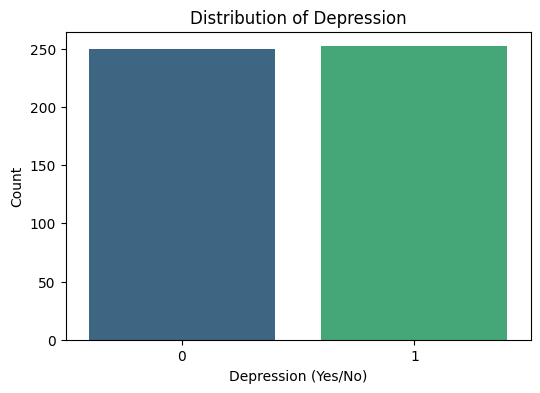

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Depression', hue='Depression', data=data, palette='viridis', dodge=False)
plt.title('Distribution of Depression')
plt.xlabel('Depression (Yes/No)')
plt.ylabel('Count')
plt.legend([], [], frameon=False) 
plt.show()

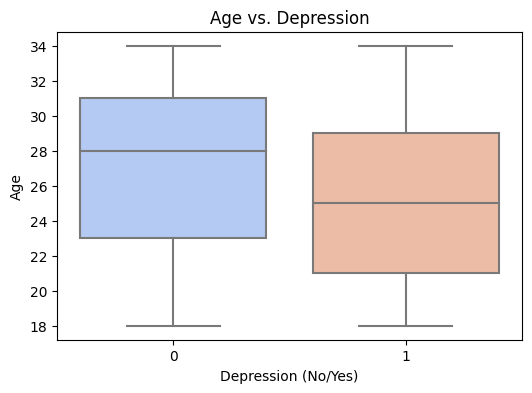

In [9]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Depression', y='Age', data=data, palette='coolwarm')
plt.title('Age vs. Depression')
plt.xlabel('Depression (No/Yes)')
plt.ylabel('Age')
plt.show()

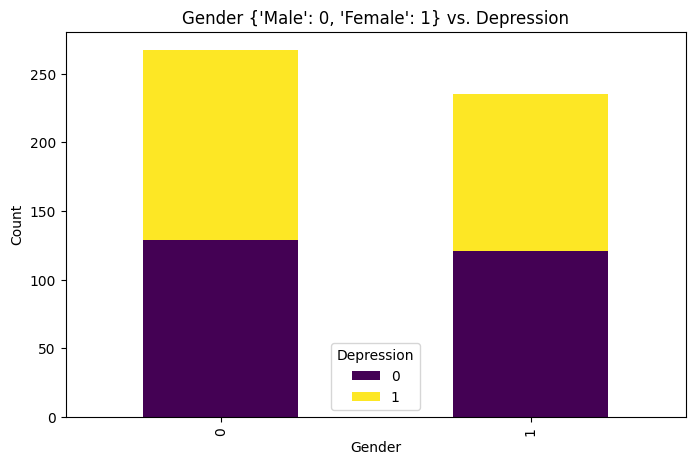

In [10]:
gender_depression = data.groupby(['Gender', 'Depression']).size().unstack()
gender_depression.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='viridis')
plt.title("Gender {'Male': 0, 'Female': 1} vs. Depression")
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Depression')
plt.show()

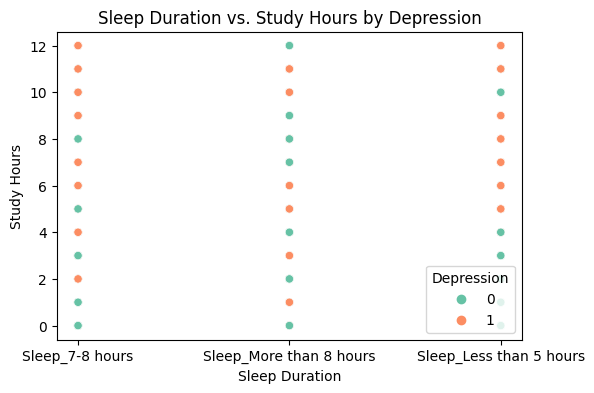

In [11]:
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x=data[['Sleep_7-8 hours', 'Sleep_Less than 5 hours', 'Sleep_More than 8 hours']].idxmax(axis=1),
    y='Study Hours',
    hue='Depression',
    data=data,
    palette='Set2'
)
plt.title('Sleep Duration vs. Study Hours by Depression')
plt.xlabel('Sleep Duration')
plt.ylabel('Study Hours')
plt.legend(title='Depression')
plt.show()

In [ ]:
data.isnull().sum()


Menu:
1. Decision Tree
2. Logistic Regression
3. Random Forest
4. Ensemble Method
5. Exit


Enter your choice:  1



-------------- Decision Tree ------------
1. Actual vs Predicted
2. Classification Report
3. Accuracy
4. Confusion Matrix
5. Try User Input
6. Back to Main Menu


Enter your choice:  1


Actual vs Predicted for Decision Tree:
[(0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 0), (1, 1), (1, 1), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 0), (1, 1), (0, 1), (0, 0), (1, 1), (0, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 0), (1, 0), (0, 1), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 0), (1, 1), (0, 0), (1, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 0), (0, 1), (0, 1)]

-------------- Decision Tree ------------
1. Actual vs Predicted
2. Classification Report
3. Accuracy
4. Confusion Matrix
5. Try User Input
6. Back to 

Enter your choice:  2


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        53
           1       0.85      0.81      0.83        48

    accuracy                           0.84       101
   macro avg       0.84      0.84      0.84       101
weighted avg       0.84      0.84      0.84       101


-------------- Decision Tree ------------
1. Actual vs Predicted
2. Classification Report
3. Accuracy
4. Confusion Matrix
5. Try User Input
6. Back to Main Menu


Enter your choice:  3


Accuracy for Decision Tree: 0.84

-------------- Decision Tree ------------
1. Actual vs Predicted
2. Classification Report
3. Accuracy
4. Confusion Matrix
5. Try User Input
6. Back to Main Menu


Enter your choice:  4


Confusion Matrix for Decision Tree:


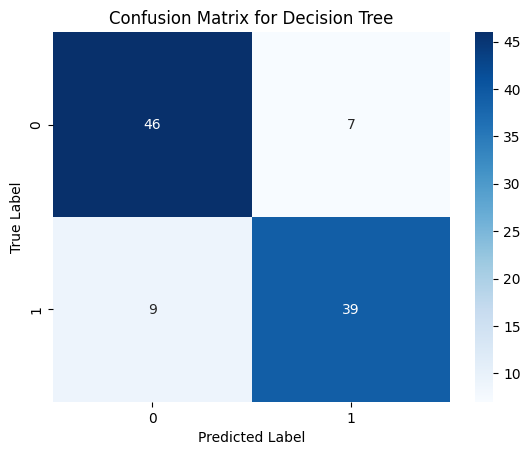


-------------- Decision Tree ------------
1. Actual vs Predicted
2. Classification Report
3. Accuracy
4. Confusion Matrix
5. Try User Input
6. Back to Main Menu


Enter your choice:  6



Menu:
1. Decision Tree
2. Logistic Regression
3. Random Forest
4. Ensemble Method
5. Exit


Enter your choice:  3



-------------- Random Forest ------------
1. Actual vs Predicted
2. Classification Report
3. Accuracy
4. Confusion Matrix
5. Try User Input
6. Back to Main Menu


Enter your choice:  3


Accuracy for Random Forest: 0.92

-------------- Random Forest ------------
1. Actual vs Predicted
2. Classification Report
3. Accuracy
4. Confusion Matrix
5. Try User Input
6. Back to Main Menu


Enter your choice:  6



Menu:
1. Decision Tree
2. Logistic Regression
3. Random Forest
4. Ensemble Method
5. Exit


Enter your choice:  5


In [12]:
X = data[['Age', 'Academic Pressure', 'Study Satisfaction', 'Study Hours',
          'Financial Stress', 'Have you ever had suicidal thoughts ?',
          'Dietary Habits', 'Family History of Mental Illness',
          'Sleep_7-8 hours', 'Sleep_Less than 5 hours', 'Sleep_More than 8 hours']]
y = data['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dt_model = DecisionTreeClassifier(random_state=30)
logistic_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier(random_state=30)

ensemble_model = VotingClassifier(estimators=[('dt', dt_model), ('logistic', logistic_model), ('rf', rf_model)], voting='hard')

# Train models
dt_model.fit(X_train_scaled, y_train)
logistic_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)
ensemble_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test_scaled)
y_pred_logistic = logistic_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_ensemble = ensemble_model.predict(X_test_scaled)

# Function to display accuracy
def accuracy_display(model_name):
    if model_name == 'Decision Tree':
        accuracy = accuracy_score(y_test, y_pred_dt)
    elif model_name == 'Logistic Regression':
        accuracy = accuracy_score(y_test, y_pred_logistic)
    elif model_name == 'Random Forest':
        accuracy = accuracy_score(y_test, y_pred_rf)
    elif model_name == 'Ensemble':
        accuracy = accuracy_score(y_test, y_pred_ensemble)
    print(f'Accuracy for {model_name}: {accuracy:.2f}')

# Function to display classification report
def classification_report_display(model_name):
    print(f"Classification Report for {model_name}:")
    if model_name == 'Decision Tree':
        print(classification_report(y_test, y_pred_dt))
    elif model_name == 'Logistic Regression':
        print(classification_report(y_test, y_pred_logistic))
    elif model_name == 'Random Forest':
        print(classification_report(y_test, y_pred_rf))
    elif model_name == 'Ensemble':
        print(classification_report(y_test, y_pred_ensemble))

# Function to display confusion matrix
def confusion_matrix_display(model_name):
    print(f"Confusion Matrix for {model_name}:")
    if model_name == 'Decision Tree':
        cm = confusion_matrix(y_test, y_pred_dt)
    elif model_name == 'Logistic Regression':
        cm = confusion_matrix(y_test, y_pred_logistic)
    elif model_name == 'Random Forest':
        cm = confusion_matrix(y_test, y_pred_rf)
    elif model_name == 'Ensemble':
        cm = confusion_matrix(y_test, y_pred_ensemble)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


# Main menu for model selection
def model_menu(model_name):
    while True:
        print(f"\n-------------- {model_name} ------------")
        print("======================================")
        print("1. Actual vs Predicted")
        print("2. Classification Report")
        print("3. Accuracy")
        print("4. Confusion Matrix")
        print("5. Try User Input")
        print("6. Back to Main Menu")
        print("======================================")

        choice = input("Enter your choice: ")

        if choice == '1':
            print(f"Actual vs Predicted for {model_name}:")
            if model_name == 'Decision Tree':
                print(list(zip(y_test, y_pred_dt)))
            elif model_name == 'Logistic Regression':
                print(list(zip(y_test, y_pred_logistic)))
            elif model_name == 'Random Forest':
                print(list(zip(y_test, y_pred_rf)))
            elif model_name == 'Ensemble':
                print(list(zip(y_test, y_pred_ensemble)))
        elif choice == '2':
            classification_report_display(model_name)
        elif choice == '3':
            accuracy_display(model_name)
        elif choice == '4':
            confusion_matrix_display(model_name)
        elif choice == '5':
            user_input(model_name)
        elif choice == '6':
            break
        else:
            print("Invalid choice. Please try again.")

# Function for user input
def user_input(model_name):
    print(f"Enter features for {model_name}:")
    age = float(input("Age: "))
    academic_pressure = float(input("Academic Pressure: "))
    study_satisfaction = float(input("Study Satisfaction (1=Low, 2=Medium, 3=High): "))
    study_hours = float(input("Study Hours: "))
    financial_stress = float(input("Financial Stress: "))
    suicidal_thoughts = int(input("Suicidal Thoughts (1=Yes, 0=No): "))
    dietary_habits = int(input("Dietary Habits (0=Healthy, 1=Moderate, 2=Unhealthy): "))
    family_history = int(input("Family History of Mental Illness (1=Yes, 0=No): "))

    print("Select Sleep Duration:")
    print("1. 7-8 hours")
    print("2. Less than 5 hours")
    print("3. More than 8 hours")
    print("4. 5-6 hours (baseline, all zeros for one-hot encoding)")

    sleep_choice = int(input("Enter your choice (1-4): "))

    if sleep_choice == 1:  # 7-8 hours
        sleep_duration = [1, 0, 0]
    elif sleep_choice == 2:  # Less than 5 hours
        sleep_duration = [0, 1, 0]
    elif sleep_choice == 3:  # More than 8 hours
        sleep_duration = [0, 0, 1]
    elif sleep_choice == 4:  # 5-6 hours (baseline)
        sleep_duration = [0, 0, 0]
    else:
        print("Invalid choice. Defaulting to 5-6 hours (baseline).")
        sleep_duration = [0, 0, 0]

    user_data = [[age, academic_pressure, study_satisfaction, study_hours, financial_stress,
                  suicidal_thoughts, dietary_habits, family_history] + sleep_duration]

    user_data_scaled = scaler.transform(user_data)

    if model_name == 'Decision Tree':
        prediction = dt_model.predict(user_data_scaled)
    elif model_name == 'Logistic Regression':
        prediction = logistic_model.predict(user_data_scaled)
    elif model_name == 'Random Forest':
        prediction = rf_model.predict(user_data_scaled)
    elif model_name == 'Ensemble':
        prediction = ensemble_model.predict(user_data_scaled)

    print(f"Prediction for {model_name}: {prediction[0]} (1 = Depression, 0 = No Depression)")

def menu():
    while True:
        print("\nMenu:")
        print("======================================")
        print("1. Decision Tree")
        print("2. Logistic Regression")
        print("3. Random Forest")
        print("4. Ensemble Method")
        print("5. Exit")
        print("======================================")

        choice = input("Enter your choice: ")

        if choice == '1':
            model_menu('Decision Tree')
        elif choice == '2':
            model_menu('Logistic Regression')
        elif choice == '3':
            model_menu('Random Forest')
        elif choice == '4':
            model_menu('Ensemble')
        elif choice == '5':
            break
        else:
            print("Invalid choice. Please try again.")

menu()